自定义函数

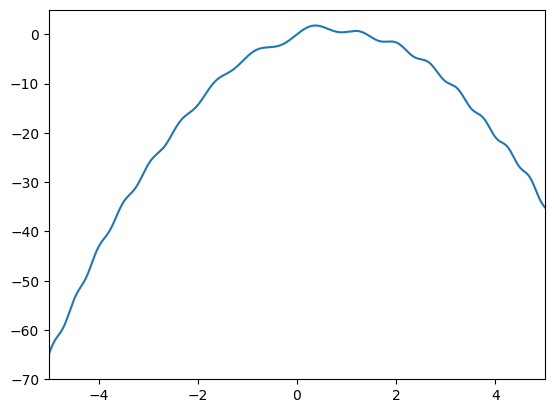

In [33]:
from __future__ import print_function
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

def f(x):
    return 3 * x - 2 * x ** 2  + np.sin(5*x) * np.cos(x**2)

x_data = np.linspace(-5, 5, 1000)
y_data = f(x_data)

plt.axis([-5, 5, -70, 5])
plt.plot(x_data, y_data)
plt.show()

In [42]:
def add_layer(inputs, in_size, out_size, activation_function=None):
    # add one more layer and return the output of this layer
    Weights = tf.Variable(shape=[ in_size, out_size], dtype=tf.float32,initial_value=tf.random.uniform(shape=[in_size, out_size],
                          minval=-0.1, maxval=0.1))
    biases = tf.Variable(shape=[out_size], dtype=tf.float32, initial_value=tf.zeros(out_size))
    Wx_plus_b = tf.matmul(inputs, Weights) + biases
    if activation_function is None:
        outputs = Wx_plus_b
    else:
        outputs = activation_function(Wx_plus_b)
    return outputs


In [43]:
# define placeholder for inputs to network
#xs = tf.placeholder(tf.float32, [None, 1])
#ys = tf.placeholder(tf.float32, [None, 1])
# add hidden layer
l1 = add_layer(x_data, 1, 64, activation_function=tf.nn.relu)
l2 = add_layer(l1, 64, 8, activation_function=tf.nn.relu)
# add output layer
prediction = add_layer(l2, 8, 1, activation_function=None)
 
# the error between prediciton and real data
loss = tf.reduce_mean(tf.reduce_sum(tf.square(y_data - prediction),
                     reduction_indices=[1]))
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(loss)
 
# important step
init = tf.initialize_all_variables()
sess = tf.Session()
sess.run(init)

ValueError: initial_value: Tensor conversion requested dtype float64 for Tensor with dtype float32: <tf.Tensor: shape=(1, 64), dtype=float32, numpy=
array([[-0.06704943,  0.00487814,  0.04202547, -0.09579804,  0.02399275,
         0.04133672,  0.04728759, -0.01768275,  0.09770072,  0.02960647,
        -0.0426945 , -0.09134588,  0.01562941,  0.05028797, -0.00676992,
        -0.07583256, -0.02491043, -0.07778819, -0.09808183,  0.08964384,
         0.07200243,  0.04966218, -0.07350962,  0.06784273, -0.0293119 ,
        -0.02843056,  0.08546843,  0.05546058,  0.01985333, -0.061061  ,
         0.05528253,  0.01737054, -0.04422095,  0.06324924,  0.00616679,
        -0.02252781, -0.06925128, -0.00851975,  0.04678445, -0.06324112,
        -0.0134811 ,  0.01652066,  0.04795573,  0.03564785, -0.09777766,
        -0.04810212,  0.01570272,  0.05470366, -0.00614679, -0.00993719,
        -0.06228633, -0.090692  , -0.05602396, -0.02021682, -0.07342613,
        -0.02349243,  0.04532392,  0.04374454,  0.07770175, -0.06398401,
        -0.0252794 ,  0.02837057, -0.08301518,  0.03512547]],
      dtype=float32)>